In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(r"C:\Users\e870859\Desktop\Data Science\7. Deep Learning Compititions\Tutorial -14 Humpback Whale Identification Challenge\whale-categorization-playground"))

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

['sample_submission.csv', 'test', 'train', 'train.csv']


In [39]:
train = pd.read_csv(r"C:\Users\e870859\Desktop\Data Science\7. Deep Learning Compititions\Tutorial -14 Humpback Whale Identification Challenge\whale-categorization-playground\train.csv")

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9850 entries, 0 to 9849
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   9850 non-null   object
 1   Id      9850 non-null   object
dtypes: object(2)
memory usage: 154.0+ KB


In [41]:
train.shape

(9850, 2)

In [42]:
train.Id.describe()

count          9850
unique         4251
top       new_whale
freq            810
Name: Id, dtype: object

In [43]:
train.head(10)

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3
5,0025e8c2.jpg,w_8b1ca89
6,0026a8ab.jpg,w_eaad6a8
7,0031c258.jpg,new_whale
8,0035632e.jpg,w_3d0bc7a
9,0037e7d3.jpg,w_50db782


In [44]:
train.tail(10)

,Image,Id
9840,ffc0b437.jpg,w_ace8c54
9841,ffc6986f.jpg,w_fce6ab2
9842,ffcfd124.jpg,w_41a260a
9843,ffd01d82.jpg,w_6249155
9844,ffd1e7aa.jpg,new_whale
9845,ffe5c306.jpg,w_2ceab05
9846,ffeaa7a4.jpg,w_b067417
9847,ffecec63.jpg,w_8b56cb1
9848,fff04277.jpg,w_2dcbf82
9849,fffd4260.jpg,w_b9bfd4e


In [45]:
# put labels into y_train variable
y_train = train["Id"]
# Drop 'Id' column
X_train = train.drop(labels = ["Id"], axis = 1)
y_train.head()

0    w_e15442c
1    w_1287fbc
2    w_da2efe0
3    w_19e5482
4    w_f22f3e3
Name: Id, dtype: object

In [46]:
# Indicates sum of values in our data
train.isnull().sum().sum()

0

## Preparing Images

In [47]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

def prepareImages(train, shape, path):
    
    x_train = np.zeros((shape, 100, 100, 3))
    count = 0
    
    for fig in train['Image']:
        
        #load images into images of size 100x100x3
        img = image.load_img("C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -14 Humpback Whale Identification Challenge/whale-categorization-playground/train/"+path+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        x_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return x_train

In [48]:
x_train = prepareImages(train, train.shape[0], "train")

Processing image:  1 ,  00022e1a.jpg
Processing image:  501 ,  0c64ae81.jpg
Processing image:  1001 ,  19546e12.jpg
Processing image:  1501 ,  27e1c585.jpg
Processing image:  2001 ,  34453b91.jpg
Processing image:  2501 ,  414cb204.jpg
Processing image:  3001 ,  4e7b614f.jpg
Processing image:  3501 ,  5b1823d1.jpg
Processing image:  4001 ,  68d47887.jpg
Processing image:  4501 ,  74f20dc3.jpg
Processing image:  5001 ,  81c129dd.jpg
Processing image:  5501 ,  8e84444c.jpg
Processing image:  6001 ,  9c8173f2.jpg
Processing image:  6501 ,  a899eaba.jpg
Processing image:  7001 ,  b5c23b76.jpg
Processing image:  7501 ,  c25a929e.jpg
Processing image:  8001 ,  cf839e92.jpg
Processing image:  8501 ,  dcfa710f.jpg
Processing image:  9001 ,  ea462ed5.jpg
Processing image:  9501 ,  f70aaa64.jpg


In [49]:
x_train.shape

(9850, 100, 100, 3)

In [ ]:
x_train

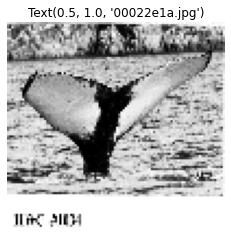

In [51]:
# Some examples(first one)
plt.imshow(x_train[0][:,:,0], cmap="gray")
plt.title(plt.title(train.iloc[0,0]))
plt.axis("off")
plt.show()

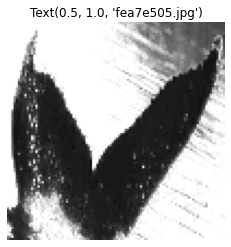

In [52]:
# Some examples(last one)
plt.imshow(x_train[9800][:,:,0], cmap="gray")
plt.title(plt.title(train.iloc[9800,0]))
plt.axis("off")
plt.show()

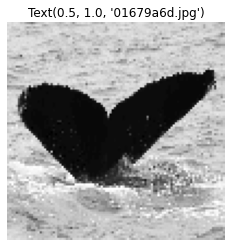

In [53]:
# Some examples(55th)
plt.imshow(x_train[55][:,:,0], cmap="gray")
plt.title(plt.title(train.iloc[55,0]))
plt.axis("off")
plt.show()

## Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [55]:
y_train = label_encoder.fit_transform(y_train)

In [56]:
#let's look at first 10 values
y_train[0:10]  # => new_whale :)

array([3741,  310, 3613,  418, 4012, 2332, 3889,    0,  991, 1341])

In [57]:
y_train.shape

(9850,)

In [58]:
train.Id.describe()

count          9850
unique         4251
top       new_whale
freq            810
Name: Id, dtype: object

In [59]:
# convert to one-hot-encoding(one hot vectors)
# we have 4251 class look at from=> train.Id.describe()

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 4251)

In [60]:
#converted
print(y_train.shape)
y_train #let's look at vectors

(9850, 4251)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Implementing with Keras

In [61]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential # to create a cnn model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [62]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (100,100,3)))
model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(y_train.shape[1], activation = "softmax"))

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 100, 100, 16)      1216      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 16)      6416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 32)        0         
__________

In [64]:
## Set the Optimizer and Annealer

In [65]:
# Define the optimizer
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [66]:
# # Define the optimizer
# optimizer = RMSprop(lr = 0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [67]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [68]:
## Compile Model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

## Data Augmentation

In [69]:
# if you want to use Data Augmentation,Activate it.

In [70]:
# # With data augmentation to prevent overfitting

# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(x_train)

In [71]:
epochs = 10  # for better result increase the epochs
batch_size = 50

#Fit the Model

In [72]:
#if you don't want to use data augmentation ,Use this code.
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[learning_rate_reduction])

Epoch 1/10
 - 373s - loss: 8.2011 - acc: 0.0393
Epoch 2/10
 - 376s - loss: 7.4151 - acc: 0.0684
Epoch 3/10
 - 359s - loss: 6.6998 - acc: 0.0807
Epoch 4/10
 - 349s - loss: 5.9578 - acc: 0.0976
Epoch 5/10
 - 375s - loss: 5.0945 - acc: 0.1394
Epoch 6/10
 - 411s - loss: 4.1226 - acc: 0.2419
Epoch 7/10
 - 406s - loss: 3.1326 - acc: 0.3948
Epoch 8/10
 - 379s - loss: 2.2509 - acc: 0.5612
Epoch 9/10
 - 397s - loss: 1.5597 - acc: 0.7064
Epoch 10/10
 - 399s - loss: 1.0612 - acc: 0.8020


In [73]:
# history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
#                               epochs=100, verbose = 2, 
#                               steps_per_epoch=x_train.shape[0] // batch_size,
#                               callbacks=[learning_rate_reduction]) 

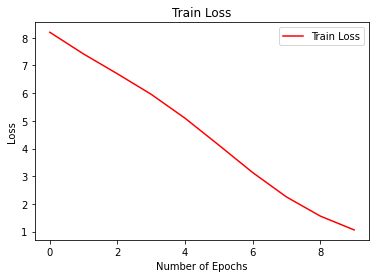

In [75]:
# Plot the loss curve for training
plt.plot(history.history['loss'], color='r', label="Train Loss")
plt.title("Train Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

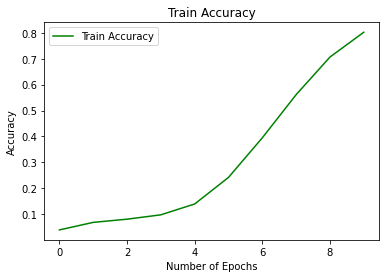

In [76]:
# Plot the accuracy curve for training
plt.plot(history.history['acc'], color='g', label="Train Accuracy")
plt.title("Train Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [77]:
print('Train accuracy of the model: ',history.history['acc'][-1])

Train accuracy of the model:  0.8020304526169288


In [78]:
print('Train loss of the model: ',history.history['loss'][-1])

Train loss of the model:  1.0612282323353182


In [89]:
test = os.listdir(r"C:\Users\e870859\Desktop\Data Science\7. Deep Learning Compititions\Tutorial -14 Humpback Whale Identification Challenge\whale-categorization-playground\test\test")
print(len(test))

15610


In [90]:
col = ['Image']
test_data = pd.DataFrame(test, columns=col)
test_data['Id'] = ''

In [94]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

def prepareImages_test(train, shape, path):
    
    x_train = np.zeros((shape, 100, 100, 3))
    count = 0
    
    for fig in train['Image']:
        
        #load images into images of size 100x100x3
        img = image.load_img("C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -14 Humpback Whale Identification Challenge/whale-categorization-playground/test/"+path+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        x_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return x_train

In [95]:
x_test = prepareImages_test(test_data, test_data.shape[0], "test")

Processing image:  1 ,  00029b3a.jpg
Processing image:  501 ,  08b6e5c4.jpg
Processing image:  1001 ,  10fc4341.jpg
Processing image:  1501 ,  1a12eb86.jpg
Processing image:  2001 ,  2248e860.jpg
Processing image:  2501 ,  2a0aae7c.jpg
Processing image:  3001 ,  32613d37.jpg
Processing image:  3501 ,  397bc85e.jpg
Processing image:  4001 ,  41b3e3f2.jpg
Processing image:  4501 ,  49d784a7.jpg
Processing image:  5001 ,  51bb0a53.jpg
Processing image:  5501 ,  5a355191.jpg
Processing image:  6001 ,  625b9d11.jpg
Processing image:  6501 ,  6a122b8b.jpg
Processing image:  7001 ,  728695cc.jpg
Processing image:  7501 ,  7b1cce35.jpg
Processing image:  8001 ,  83379226.jpg
Processing image:  8501 ,  8b2b5ad2.jpg
Processing image:  9001 ,  9342fe8a.jpg
Processing image:  9501 ,  9b343ec6.jpg
Processing image:  10001 ,  a383d0e2.jpg
Processing image:  10501 ,  abfde6fc.jpg
Processing image:  11001 ,  b495d543.jpg
Processing image:  11501 ,  bcb01ea1.jpg
Processing image:  12001 ,  c3fb2fa4.jpg

In [97]:
x_test /= 255

In [98]:
predictions = model.predict(np.array(x_test), verbose=1)

15610/15610 [==============================] - 266s 17ms/step


In [99]:
for i, pred in enumerate(predictions):
    test_data.loc[i, 'Id'] = ' '.join(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]))

In [100]:
test_data.head(10)
test_data.to_csv('submission_3.csv', index=False)